In [149]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from pywaffle import Waffle
import numpy as np
import math

In [2]:
prec = 0.87
recall = 0.37

In [3]:
# (prec - 1) * tp + prec * fp = 0
#(recall - 1) * tp + recall * fn = 0 
# tp + fp + fn + tn = 1

SyntaxError: can't assign to operator (<ipython-input-3-411b0d50f7f8>, line 1)

In [231]:
y_true = [0, 0, 1, 1, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1, 0, 0]
cm = confusion_matrix(y_true, y_pred)

In [232]:
cm

array([[4, 1],
       [2, 2]])

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


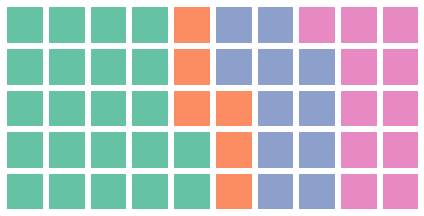

In [233]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,  # Either rows or columns could be omitted
    values=cm.ravel()
)
fig.show()

In [234]:
tn, fp, fn, tp = cm.ravel()

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


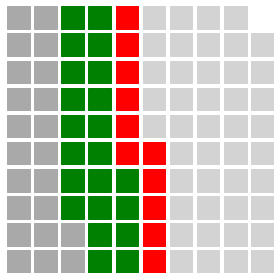

In [235]:
reordered = [fn, tp, fp, tn]
colors=["darkgrey", "green", "red", "lightgrey"]
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=10,  # Either rows or columns could be omitted
    values=reordered,
    colors=["darkgrey", "green", "red", "lightgrey"]
)
fig.show()

<class 'pywaffle.waffle.Waffle'>


/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


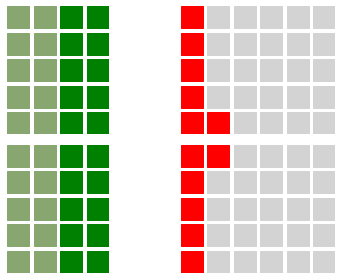

In [240]:
reordered = [fn, tp, fp, tn]
colors=["#88a770", "green", "red", "lightgrey"]

rows = 10
cols = 10
col_ratio = (fn+tp)/sum(reordered)
col_part = int(round(cols * col_ratio))

fig = plt.figure(
    FigureClass=Waffle,
    rows=rows // 2,
      # Either rows or columns could be omitted
    plots = {
        "221": {
            'values':[n/2 for n in reordered[:2] ],
            'starting_location': "NW",
            "colors": colors[:2],
            "columns": col_part,
        },
        "223": {
            'values':[n/2 for n in reordered[:2] ],
            'starting_location': "SW",
            "colors": colors[:2],
            "columns": col_part,
        },
        
        "222": {
            'values':[n/2 for n in reordered[2:] ],
            'starting_location': "SW",
            "colors": colors[2:],
            "columns": cols - col_part,
        },
        "224": {
            'values':[n/2 for n in reordered[2:] ],
            'starting_location': "NW",
            "colors": colors[2:],
            "columns": cols - col_part,
        },
        
    },
    #values=[fn/2, tp/2],
    
    vertical=False,
)

print(fig.__class__)

fig.show()

(4, 2)
(9, 8)
midh = 4 h = 9
tp =64
fp = 32


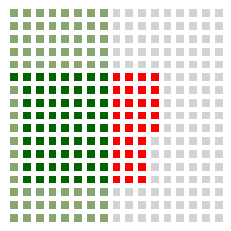

In [282]:

def build_waffle_matrix(size, confusion_matrix):
    rows, cols = size
    hmap = np.zeros( (rows, cols) )
    tn, fp, fn, tp = cm.ravel()
    col_ratio = (fn+tp)/sum(cm.ravel())
    col_part = int(math.floor(cols * col_ratio))
    col_rest = int()

    for ix in range(rows):
        for iy in range(col_part):
            hmap[ix, iy] = 1
        for iy in range(col_part, cols):
            hmap[ix, iy] = 4

    h = int(math.ceil(max( tp/col_part, fp / (cols - col_part)) * rows * cols/ sum(reordered)))


    a = int(math.ceil(tp/h * cols))
    b = int(math.ceil(fp/h * cols))

    print((a, b))

    centery = col_part
    centerx = int(math.ceil(rows / 2))
    print( (centerx, centery) )
    midh = int(round(h/2))
    tp_boxes = int(round(tp * cols * rows / sum(reordered)))
    fp_boxes = int(round(fp * cols * rows / sum(reordered)))
    print(f"midh = {midh} h = {h}")
    print(f"tp ={tp_boxes}")
    print(f"fp = {fp_boxes}")
    for n in range(tp_boxes):
        ix = centerx - midh + (n % h)
        iy = centery - n//h - 1
        hmap[ix, iy] = 2

    for n in range(fp_boxes):
        ix = centerx - midh + (n % h)
        iy = centery + n//h 
        hmap[ix, iy] = 3
    return hmap

def plot_waffle_matrix(hmap, 
                       cmap = (mpl.colors.ListedColormap(["#88a770", "darkgreen", "red", "lightgrey"])), 
                       linewidth=5
                      ):
    fig, ax = plt.subplots()

    im = ax.imshow(hmap, cmap=cmap)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    unitmove = 1.0
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticks(np.arange(hmap.shape[1]+unitmove)-unitmove/2, minor=True)
    ax.set_yticks(np.arange(hmap.shape[0]+unitmove)-unitmove/2, minor=True)
    
    ax.grid(which="minor", color="w", linestyle='-', linewidth=linewidth)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

hmap = build_waffle_matrix( (17, 17), cm)
plot_waffle_matrix(hmap)

In [283]:
cols = 17
rows = 17
hmap = build_waffle_matrix( (cols, rows), cm)
tn, fp, fn, tp = cm.ravel()
_, counts = np.unique(hmap, return_counts=True)
ordered_vector = [fn, tp, fp, tn]
normalized_vect =  ordered_vector / sum(ordered_vector) * cols * rows

print(normalized_vect)
print(counts)
print(f"counts sum = {sum(counts)} - cols x rows = { cols * rows} ")

error = (np.max(ratios) - np.min(ratios)) #/np.sum(ratios)
error

(4, 2)
(9, 8)
midh = 4 h = 9
tp =64
fp = 32
[ 64.22222222  64.22222222  32.11111111 128.44444444]
[ 72  64  32 121]
counts sum = 289 - cols x rows = 289 


0.005280073461891646

In [177]:
tp/sum(reordered) * cols * rows


42.857142857142854

In [179]:
7*6+1

43

In [184]:
max( tp/col_part, fp / (cols - col_part))

0.5

In [185]:
(tp/col_part, fp / (cols - col_part))

(0.5, 0.25)

In [186]:
col_part

6